In [6]:
import tensorflow as tf
#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Importing Dependencies
%matplotlib inline

import math

In [7]:
#액셀파일 열기
train = pd.read_excel('ap_data.xlsx')
train.head(3)

,USER_TYPE,ACCESS_SUCCESS_YN,AUTHENTICATION_TIME,AP_TYPE,AP IP주소,AP가 있는 건물-층,"AP의 위도, 경도",AP MAC-SHA256해쉬값전환,사용자단말MAC-SHA256해쉬값전환
0,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
1,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
2,학생,Success,2019-05-01 00:21:42,전남대AP,168.131***,기초특성화과학관-7층,"35.175860, 126.911051",qqGqT,1V/2G


In [8]:
train.shape

(124863, 9)

In [9]:
#variable in the data
train.columns

Index(['USER_TYPE', 'ACCESS_SUCCESS_YN', 'AUTHENTICATION_TIME', 'AP_TYPE',
       'AP IP주소', 'AP가 있는 건물-층', 'AP의 위도, 경도', 'AP MAC-SHA256해쉬값전환',
       '사용자단말MAC-SHA256해쉬값전환'],
      dtype='object')

In [11]:
#data types of different variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124863 entries, 0 to 124862
Data columns (total 9 columns):
USER_TYPE               124863 non-null object
ACCESS_SUCCESS_YN       124863 non-null object
AUTHENTICATION_TIME     124863 non-null datetime64[ns]
AP_TYPE                 124863 non-null object
AP IP주소                 124863 non-null object
AP가 있는 건물-층             124824 non-null object
AP의 위도, 경도              124824 non-null object
AP MAC-SHA256해쉬값전환      120301 non-null object
사용자단말MAC-SHA256해쉬값전환    120301 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 8.6+ MB


In [12]:
train.describe()

,USER_TYPE,ACCESS_SUCCESS_YN,AUTHENTICATION_TIME,AP_TYPE,AP IP주소,AP가 있는 건물-층,"AP의 위도, 경도",AP MAC-SHA256해쉬값전환,사용자단말MAC-SHA256해쉬값전환
count,124863,124863,124863,124863,124863,124824,124824,120301,120301
unique,2,2,58256,2,4,32,14,76,848
top,학생,Success,2019-06-07 09:00:02,통신사AP,14.48.1***,명학회관-4층,"35.173844, 126.911247",9REc7,117/x
freq,95664,120301,12,93139,93102,21731,32384,9626,5293
first,NaN,NaN,2019-05-01 00:08:35,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-06-30 23:58:02,NaN,NaN,NaN,NaN,NaN,NaN


/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/pyth

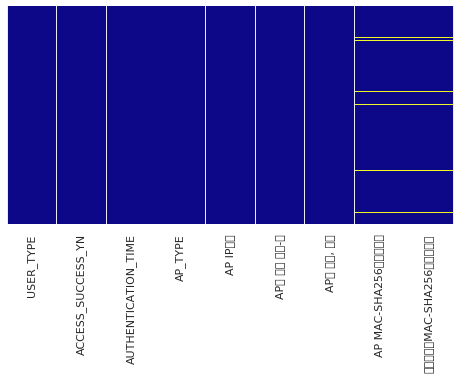

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [17]:
train1 = train.loc[(train['AP가 있는 건물-층']=="명학회관-4층")|(train['AP가 있는 건물-층']=="명학회관-3층"),:]
train1.head(50)

,USER_TYPE,ACCESS_SUCCESS_YN,AUTHENTICATION_TIME,AP_TYPE,AP IP주소,AP가 있는 건물-층,"AP의 위도, 경도",AP MAC-SHA256해쉬값전환,사용자단말MAC-SHA256해쉬값전환
0,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
1,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
4,학생,Success,2019-05-01 00:22:35,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
5,학생,Success,2019-05-01 00:22:35,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
8,학생,Success,2019-05-01 00:41:27,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
9,학생,Success,2019-05-01 00:41:27,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
10,학생,Success,2019-05-01 00:43:40,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
11,학생,Success,2019-05-01 00:43:40,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
12,학생,Success,2019-05-01 01:08:13,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o
13,학생,Success,2019-05-01 01:08:13,통신사AP,14.48.1***,명학회관-4층,"35.141651, 126.923151",I2pyU,MJj9o


In [18]:
train1 = train1.drop('AP가 있는 건물-층',1)
train1['all_num'] = 1
train1.head(3)

,USER_TYPE,ACCESS_SUCCESS_YN,AUTHENTICATION_TIME,AP_TYPE,AP IP주소,"AP의 위도, 경도",AP MAC-SHA256해쉬값전환,사용자단말MAC-SHA256해쉬값전환,all_num
0,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
1,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
4,학생,Success,2019-05-01 00:22:35,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1


In [19]:
train1.set_index(train1['AUTHENTICATION_TIME'], inplace=True)
train1.head(10)

,USER_TYPE,ACCESS_SUCCESS_YN,AUTHENTICATION_TIME,AP_TYPE,AP IP주소,"AP의 위도, 경도",AP MAC-SHA256해쉬값전환,사용자단말MAC-SHA256해쉬값전환,all_num
AUTHENTICATION_TIME,,,,,,,,,
2019-05-01 00:08:35,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 00:08:35,학생,Success,2019-05-01 00:08:35,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 00:22:35,학생,Success,2019-05-01 00:22:35,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 00:22:35,학생,Success,2019-05-01 00:22:35,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 00:41:27,학생,Success,2019-05-01 00:41:27,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 00:41:27,학생,Success,2019-05-01 00:41:27,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 00:43:40,학생,Success,2019-05-01 00:43:40,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 00:43:40,학생,Success,2019-05-01 00:43:40,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1
2019-05-01 01:08:13,학생,Success,2019-05-01 01:08:13,통신사AP,14.48.1***,"35.141651, 126.923151",I2pyU,MJj9o,1


In [35]:
minute_df = train1.resample('30T', how={'all_num':np.sum}).fillna(0)
minute_df.head(5)

/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


,all_num
AUTHENTICATION_TIME,
2019-05-01 00:00:00,4
2019-05-01 00:30:00,4
2019-05-01 01:00:00,8
2019-05-01 01:30:00,0
2019-05-01 02:00:00,2


In [36]:
minute_df.describe()

,all_num
count,2928.000000
mean,10.520833
std,14.433911
min,0.000000
25%,0.000000
50%,6.000000
75%,14.000000
max,245.000000


In [37]:
minute_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2928 entries, 2019-05-01 00:00:00 to 2019-06-30 23:30:00
Freq: 30T
Data columns (total 1 columns):
all_num    2928 non-null int64
dtypes: int64(1)
memory usage: 45.8 KB


In [50]:
#두달 간의 데이터가 있고, 평균은 10명, 최대는 245이다
#50%의 데이터가 6이므로 3단계로 잡았다
#75%가 14이므로 4단계 그 위는 무조건 5단계이다.
minute_df.loc[minute_df.all_num > 14, 'class'] = 5
minute_df.loc[minute_df.all_num <= 14, 'class'] = 4 
minute_df.loc[minute_df.all_num <= 6, 'class'] = 3
minute_df.loc[minute_df.all_num <= 4, 'class'] = 2 
minute_df.loc[minute_df.all_num <= 0, 'class'] = 1 
minute_df.head(5)

,all_num,class
AUTHENTICATION_TIME,,
2019-05-01 00:00:00,4,2
2019-05-01 00:30:00,4,2
2019-05-01 01:00:00,8,4
2019-05-01 01:30:00,0,1
2019-05-01 02:00:00,2,2


In [51]:
minute_df['class'].value_counts()

1    808
5    726
4    599
2    596
3    199
Name: class, dtype: int64

Text(0.5, 1.0, 'all_num 분포')

/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)


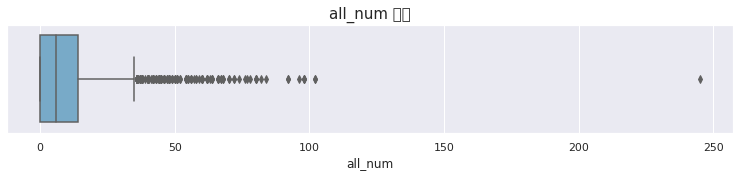

In [52]:
plt.figure(figsize=(13, 2))
sns.boxplot(x=minute_df['all_num'], palette="Blues")
plt.title('all_num 분포', fontsize=15)

In [53]:
# Create a function to count total outliers.
def outliers(variable):
    global filtered # Global keyword is used inside a function only when we want to do assignments or when we want to change a variable.
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

In [54]:
outliers(minute_df['all_num'])

Total Outliers of all_num : 174


Text(0.5, 1.0, 'all_num 분포')

/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)


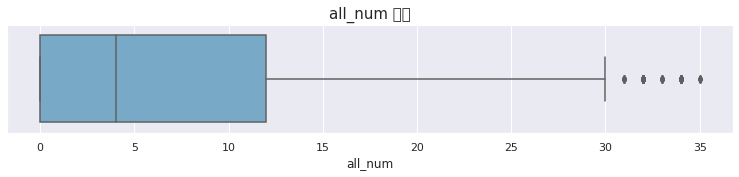

In [55]:
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered, palette="Blues")
plt.title('all_num 분포', fontsize=15)

In [56]:
minute_df['all_num'].value_counts()

0     808
2     330
4     227
6     183
8     166
     ... 
41      1
57      1
59      1
63      1
78      1
Name: all_num, Length: 80, dtype: int64

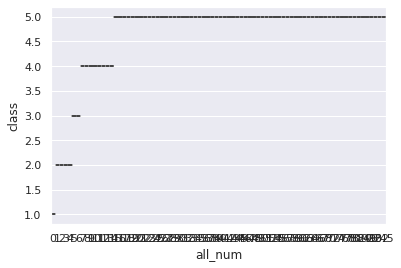

In [57]:
sns.boxplot(y='class', x='all_num', data=minute_df)

In [60]:
minute_df.columns

Index(['all_num', 'class'], dtype='object')

In [61]:
minute_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2928 entries, 2019-05-01 00:00:00 to 2019-06-30 23:30:00
Freq: 30T
Data columns (total 2 columns):
all_num    2928 non-null int64
class      2928 non-null int64
dtypes: int64(2)
memory usage: 148.6 KB


In [66]:
train_data = minute_df.iloc[:2300, :]
test_data = minute_df.iloc[2300:, :]

test_data = test_data.drop(columns = ['class'], axis = 1)

In [68]:
X_train = train_data.drop(columns = ['class'], axis = 1)
y_train = train_data['class']

X_test = test_data.copy()

In [69]:
# See the dimensions of input and output data set.'''
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

Input Matrix Dimension:   (2300, 1)
Output Vector Dimension:  (2300,)
Test Data Dimension:      (628, 1)


In [70]:
# Now initialize all the classifiers object.

#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#2.KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#3.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 40)

#4.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 40, n_estimators = 100)

#5.Support Vector Machines
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

In [71]:
# Create a function that returns train accuracy of different models.

def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy
    
# making the summary table of train accuracy.
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(knn), train_accuracy(dt), train_accuracy(rf), train_accuracy(svc)]})
train_accuracy.index = ['LR', 'KNN','DT', 'RF', 'SVC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

#Training Accuracy of the Classifiers
sorted_train_accuracy

/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,Train_accuracy(%)
KNN,100.00
DT,100.00
RF,100.00
SVC,100.00
LR,89.35


In [72]:
# Create a function that returns mean cross validation score for different models.
def val_score(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    val_score = np.round(val_score*100, 2)
    return val_score

# making the summary table of cross validation accuracy.
val_score = pd.DataFrame({'val_score(%)':[val_score(lr), val_score(knn), val_score(dt), val_score(rf), val_score(svc)]})
val_score.index = ['LR', 'KNN','DT', 'RF', 'SVC']
sorted_val_score = val_score.sort_values(by = 'val_score(%)', ascending = False)

#cross validation accuracy of the Classifiers
sorted_val_score

/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/root/anaconda3/envs/tensorflow/lib/py

,val_score(%)
KNN,100.00
DT,100.00
RF,100.00
SVC,100.00
LR,89.35


In [74]:
# Submission with the most accurate random forest classifier
submission = pd.DataFrame({
        "all_num": test_data["all_num"],
        "class": knn.predict(X_test)})
submission.to_csv('submission_KNN.csv', index = False)


# Submission with the most accurate SVC classifier.
submission = pd.DataFrame({
        "all_num": test_data["all_num"],
        "class": svc.predict(X_test)})
submission.to_csv('submission_svc.csv', index = False)